# Data Analysis

# Pandas library 🐼


Pandas is the most used library in data analysis, in fact it allows you to load a dataset in Python and save it in a particular object called **Data Frame**

First we need to import the library and it is common practice to import `pandas` using the `pd` alias for simple convenience:

In [1]:
import pandas as pd

## Upload data

There are different ways to upload data, which can be in different formats. We start by uploading a dataset in csv format ( Comma Separated Values ) and which was saved in [this web page](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv):

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


The dataset, which we just saved as a **Data Frame** on an object named `df`, contains data on measurements of the physical characteristics of some penguin populations.

We can use the `.info()` method on our `df` Data Frame to get general information about the composition of our data:

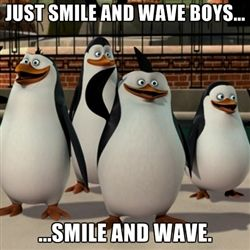

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In addition to providing us with information about the column names and the type of variable (string or numeric), the output also tells us how many rows there are in the dataset and if and how many missing values there are for each column; for example:

* the `species` column has no missing values
* the `sex` column has 344 - 333 = 11 missing values

## Methods of data management

Pandas offers several **attributes** and **methods** that can be applied to objects of type Data Frame:
- an *attribute is a data or a function that specifies a characteristic* of an object;
- a *method is a function that performs operations on an object*;
- these objects have in turn been instantiated by a **class**, such as the DataFrame class for example.

> 🤓 Check out [this article](https://towardsdatascience.com/explaining-python-classes-in-a-simple-way-e3742827c8b5) for a soft introduction to the subject of classes in Python.

## Slicing

As we have seen for strings, it is also possible to index DataFrames, which have a double index: one for the rows and one for the columns of the dataset. There are [several ways](https://pandas.pydata.org/docs/user_guide/indexing.html) to obtain a specific row or column from a Data Frame but, in order not to confuse the ideas too much, we will only look at a few.

**Slicing per row**

The `.loc[]` indicator allows us to locate a certain row by specifying the "label" of the row (in this case the index itself) that we want to obtain:

In [6]:
df.loc[8]

species                 Adelie
island               Torgersen
bill_length_mm            34.1
bill_depth_mm             18.1
flipper_length_mm        193.0
body_mass_g             3475.0
sex                        NaN
Name: 8, dtype: object

In [8]:
# to select multiple rows
df.loc[[2,8]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN


## Slicing per column

The `.loc[]` flag also works for columns, but this time we'll need to specify that we're interested in them (and not rows). To do this we use the `:` operator to ask to return **all rows** and after the `,` we specify the column (or columns) we want to select:

In [10]:
df.loc[:,'island']

0      Torgersen
1      Torgersen
2      Torgersen
3      Torgersen
4      Torgersen
         ...    
339       Biscoe
340       Biscoe
341       Biscoe
342       Biscoe
343       Biscoe
Name: island, Length: 344, dtype: object

In [11]:
# to select specific rows and columns
df.loc[:10,['species','bill_length_mm']]

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
5,Adelie,39.3
6,Adelie,38.9
7,Adelie,39.2
8,Adelie,34.1
9,Adelie,42.0


## Distinct values

The `.unique()` method, when applied to a column of a Data Frame, returns the **distinct (or unique)** values contained in that column:

In [12]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

> ☝️ The spreadsheet equivalent of the `.unique()` method is the "remove duplicates" feature or the `=UNIQUE()` function.

## Filter the data

We see that there are a total of three penguin species in the dataset. If we wanted to **filter** the Data Frame and see only the observations belonging to the 'Gentoo' species we can insert a **boolean mask** inside the `[]` operator like this:

In [13]:
df[df['species'] == 'Gentoo']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


> ☝️ The spreadsheet equivalent is a column filter (the funnel symbol) or the `=QUERY()` function with a `WHERE` clause.